In [30]:
import pandas as pd
import numpy as np


In [31]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [32]:
df = pd.read_csv("train.csv", usecols= ["Age","Fare","Survived"])

In [33]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [34]:
df.dropna(inplace = True)

In [35]:
df.shape

(331, 3)

In [36]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [37]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

In [38]:
X_train.head(2)

,Age,Fare
281,0.75,13.775
96,76.00,78.850


In [39]:
clf = DecisionTreeClassifier()

In [40]:
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)

In [41]:
accuracy = accuracy_score(Y_test, Y_pred)

print(accuracy)

0.582089552238806


In [43]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,Y, cv=10,scoring = "accuracy"))

0.5680035650623886

In [63]:
kbin_age = KBinsDiscretizer(n_bins = 15, encode = "ordinal", strategy = "quantile")
kbin_fare = KBinsDiscretizer(n_bins = 15, encode = "ordinal", strategy = "quantile")

In [64]:
trf = ColumnTransformer([
    ("first", kbin_age,[0]),
    ("second", kbin_fare,[1]),
])

In [65]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.fit_transform(X_test)

In [66]:
trf.named_transformers_["second"].n_bins_

array([15])

In [67]:
trf.named_transformers_["second"].bin_edges_

array([array([  6.4958 ,   7.42832,   7.775  ,   7.81248,   8.05   ,   9.225  ,
               10.5    ,  13.62   ,  20.22   ,  22.23   ,  27.75   ,  31.4325 ,
               50.39664,  61.     , 128.33   , 263.     ])                     ],
      dtype=object)

In [68]:
output = pd.DataFrame({
    "age": X_train["Age"],
    "age_trf": X_train_trf[:, 0],

    "fare": X_train["Fare"],
    "fare_trf": X_train_trf[:, 1]
})


In [69]:
output["age_labels"] = pd.cut(x = X_train['Age'],bins = trf.named_transformers_["first"].bin_edges_[0].tolist())

output["fare_labels"] = pd.cut(x = X_train['Fare'],bins = trf.named_transformers_["second"].bin_edges_[0].tolist())
                                            

In [70]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
387,57.0,14.0,13.0000,6.0,"(48.6, 61.0]","(10.5, 13.62]"
411,37.0,10.0,90.0000,13.0,"(31.4, 39.0]","(61.0, 128.33]"
119,29.0,7.0,26.0000,9.0,"(28.0, 31.4]","(22.23, 27.75]"
283,9.0,0.0,15.2458,7.0,"(2.4, 12.8]","(13.62, 20.22]"
32,33.0,9.0,20.5750,7.0,"(31.4, 39.0]","(20.22, 22.23]"


In [71]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,Y_train)
Y_pred2 = clf.predict(X_test_trf)

accuracy = accuracy_score(Y_test, Y_pred2)

print(accuracy)

0.6119402985074627


In [72]:
X_trf =trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,Y, cv=10,scoring = "accuracy"))

0.5711229946524063

In [73]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins = bins, encode = "ordinal", strategy = "quantile")
    kbin_fare = KBinsDiscretizer(n_bins = bins, encode = "ordinal", strategy = "quantile")

    trf = ColumnTransformer([
    ("first", kbin_age,[0]),
    ("second", kbin_fare,[1]),
    ])
    X_trf =trf.fit_transform(X)
    np.mean(cross_val_score(DecisionTreeClassifier(),X,Y, cv=10,scoring = "accuracy"))

    plt.figure(figsize = (14,4))
    plt.subplot(1 2 1)
    plt.hist(X["Age"])
    plt.title("Before")

    
    
    plt.subplot(1 2 2)
    plt.hist(X_trf[:,0],color = "red")
    plt.title("After")

    plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2131570670.py, line 13)

In [74]:
def discretize(bins, strategy, X, Y):
    # Create discretizers for age and fare
    kbin_age = KBinsDiscretizer(n_bins=bins, encode="ordinal", strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins, encode="ordinal", strategy=strategy)

    # Create a ColumnTransformer
    trf = ColumnTransformer([
        ("first", kbin_age, [0]),
        ("second", kbin_fare, [1]),
    ])

    # Transform the data
    X_trf = trf.fit_transform(X)

    # Evaluate the model using cross-validation on transformed data
    accuracy = np.mean(cross_val_score(DecisionTreeClassifier(), X_trf, Y, cv=10, scoring="accuracy"))
    print(f"Mean Accuracy: {accuracy}")

    # Plot histograms to visualize the effect of discretization
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 2, 1)
    plt.hist(X.iloc[:, 0])  # Assuming "Age" is the first column
    plt.title("Before")

    plt.subplot(1, 2, 2)
    plt.hist(X_trf[:, 0], color="red")
    plt.title("After")

    plt.tight_layout()
    plt.show()

Mean Accuracy: 0.5590909090909092


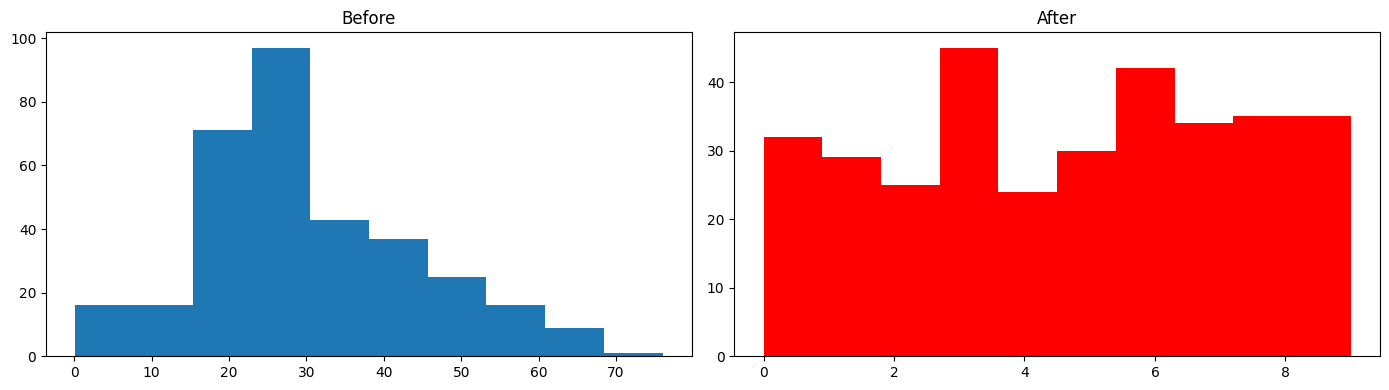

In [75]:
discretize(10, "quantile", X, Y)